# Kalorimetrie Küchentischversuch - Wärmekapazität eines Behälters

Author: Jonathan Kollmann

Datum:  19.11.2023

Gruppe: 49

## Forschungsfrage

Formulieren Sie eine oder mehrere Forschungsfragen zu diesem Versuch.

Wie groß ist die Wärmekapazität eines Gemisches aus heißen und kaltem Wasser?
Wie sehen jeweils die Temperaturverläufe während des Mischvorgangs aus?

##### Versuchsaufbau und Durchführung

Beschreiben Sie den Versuchsaufbau und die Versuchsdurchführung. Machen Sie ein Bild von Ihrem Aufbau und nutzen Sie dieses mit zur Beschreibung.

In je ein Gefäß mit einem mit dem raspberry pi verbundenen Temperatursensor werden jeweils 500 ml heißes beziehungsweise kaltes Wasser gegeben.
Die Temperaturmessungen beginnen. 
Anschließend wird das heiße Wasser mitsamt dem Sensor in das Gefäß mit kaltem  Wasser geschüttet.
Die Messungen werden manuell gestoppt, wenn sich die Flüssigkeiten vermischt haben.

<img src="figures/heat_capacity_1.jpeg" width="800">
kaltes Wasser links, heißes Wasser rechts

<img src="figures/heat_capacity_2.jpeg" width="800">
Mischung

## Versuchsauswertung

In [1]:
import numpy as np
import json
from matplotlib import pyplot as plt
# If you plan to write functions in another module,
# you can use importlib.reload(module) to reload the module
# at the beginning of each cell in order to make the latest
# changes take effect without restart the kernel.
import importlib

# Use FST-Style, if you don't like it, you can safely delete this line.
plt.style.use("FST.mplstyle")


### Wärmekapazität eines Behälters

Hinweis: Nutzen Sie die Funktionen *get_ids_from_setup* und *get_json_entry* um auf Metadaten zuzugreifen. 

Sie sollten Ihr Programm zwischen TODO und DONE implementieren, und versuchen die Anweisung zu verfolgen. Das ist aber nicht erforderlich.


#### (i) Messdaten einlesen

Messdaten werden in das Notebook eingelesen.

In [2]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.
#import h5py as h5
#with h5.File("/home/pi/calorimetry_home/data/heat_capacity/heat_capacity.h5") as f:


In [3]:
# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.
import h5py as h5
with h5.File("/home/pi/calorimetry_home/data/heat_capacity/heat_capacity.h5") as f:
    
    sensor_1 = f["RawData/1ee7f265-383a-6731-8b98-2126e6711b85"]
    sensor_1_name = f["RawData/1ee7f265-383a-6731-8b98-2126e6711b85"].attrs["name"]
    sensor_1_serial = f["RawData/1ee7f265-383a-6731-8b98-2126e6711b85"].attrs["serial"]
    sensor_2 = f["RawData/1ee7f266-937f-6479-b639-73dc121f7d8a"]
    sensor_2_name = f["RawData/1ee7f266-937f-6479-b639-73dc121f7d8a"].attrs["name"]
    sensor_2_serial = f["RawData/1ee7f266-937f-6479-b639-73dc121f7d8a"].attrs["serial"]

    temp_sensor_1 = list(sensor_1["temperature"])
    time_sensor_1 = list(sensor_1["timestamp"])
    temp_sensor_2 = list(sensor_2["temperature"])
    time_sensor_2 = list(sensor_2["timestamp"])
    

# DONE #

#### (ii) Daten ploten

findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.


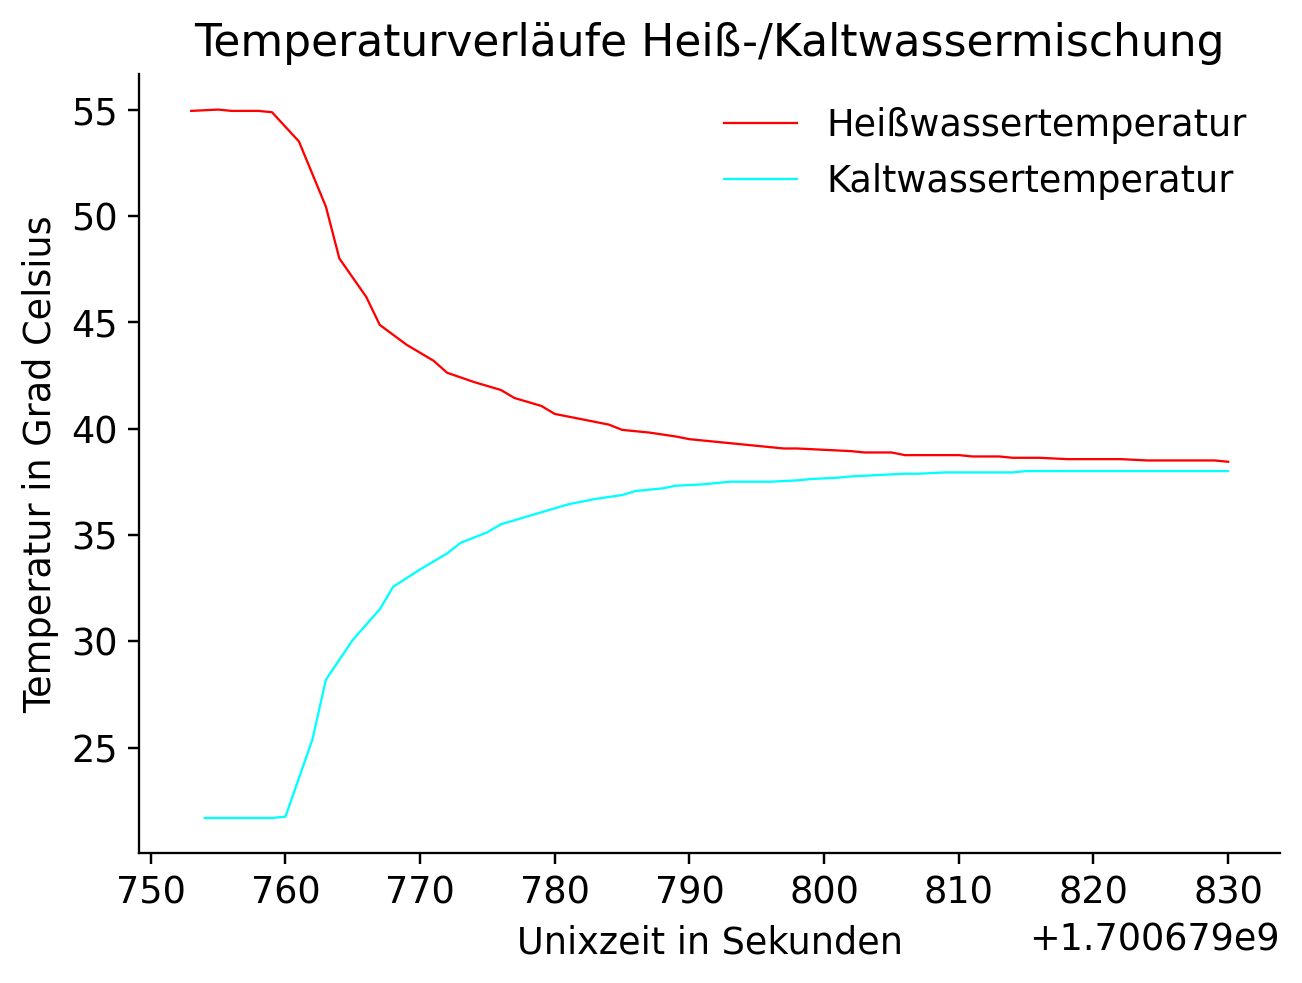

In [4]:
# TODO: Use the temperature and time data for plotting
plt.plot(time_sensor_1, temp_sensor_1, color="red", label="Heißwassertemperatur")
plt.plot(time_sensor_2, temp_sensor_2, color="aqua", label="Kaltwassertemperatur")
# Plotbeschriftung und -design
plt.legend()
plt.title("Temperaturverläufe Heiß-/Kaltwassermischung")
plt.xlabel("Unixzeit in Sekunden")
plt.ylabel("Temperatur in Grad Celsius")
# Abspeichern des Plots als separate Datei im svg-Format
plt.savefig("plot_heat_capacity.svg",format = 'svg')
# DONE #

#### (iii) Metadaten auslesen

Die notwendigen Metadaten für die Berechnung der Wärmekapazität wird ausgelesen.

In [5]:
# Heat capacity of Water
water_heat_capa = 4.18 # in kJ/kg*K
# TODO: Read mass from the metadata of the experiment.
with open ('/home/pi/calorimetry_home/data/heat_capacity/probe_heat_capacity_1ee8456c-cc71-6de4-94a5-9c092cc5696e.json', 'r') as x:
    meta = json.load(x)
    m_add = meta['probe']['metadata']['quantity_hot']
    m_cup = meta['probe']['metadata']['quantity_cold']
# DONE #

#### (iV) Anfangs- und Endwert der Temperatur

In [6]:
# TODO: Calculation of temperature data necessary to determine the specific heat capacity
T_1 = temp_sensor_2[0]
T_2 = temp_sensor_1[0]
T_M = (temp_sensor_1[-1] + temp_sensor_2[-1])/2
# DONE #

#### (V) Wärmekapazität bestimmen
$$
C = \frac{m_{add}c_{w}(T_2-T_M)}{T_M - T_1} - m_{cup}c_{w}
$$
Dabei ist $m_{add}$ die Masse vom hinzugefügten Wasser, $T_2$ ist seine Temperatur. Die Masse vom Wasser im Behälter ist $m_{cup}$ und seine Temperatur ist $T_1$. Die Mischungstemperatur ist $T_M$. Die spezifische Wärmekapazität von Wasser ist $c_w$.

In [7]:
# TODO: Calculate heat capacity of the calorimeter
capacity = (m_add*water_heat_capa*(T_2-T_M))/(T_M-T_1) - m_cup*water_heat_capa
# DONE #

#### (Vi) Ergebnis

In [8]:
# TODO: Print result
print(f'Wärmekapazität des Behälters mit kaltem Wasser beträgt C = {capacity} kJ/K')
# DONE #

Wärmekapazität des Behälters mit kaltem Wasser beträgt C = 0.023705103969754227 kJ/K


## Diskussion

Analysieren Sie Ihre Ergebnisse aus wissenschaflticher Sicht. Berücksichtigen Sie dabei Ihre oben genannte Forschungsfrage.

Die Temperaturmessverläufe haben sich sehr gut aneinander angenähert. Trotzdem wurde zur genaueren Berechnung bei der Mischungstemperatur der Mittelwert der jeweils letzten Temperaturwerte der Sensoren gebildet. Mit dem Versuch wurde gezeigt, dass der halbe Liter Wasser bei Raumptemperatur eine Wärmekapazität von circa 23,7 J/K hat. Außerdem lässt sich am Graphen ablesen, dass die Temperatur des Gemischs etwa 38 Grad Celsius beträgt.

## Fazit
Ziehe Sie ein persönliches Fazit zum Versuch.

Grundsätzlich schöner Versuch. Leider beschäftigt man sich mit diesem konkret höchstens 1/100 der Zeit.
Immenser Aufwand steht in keinem Verhältnis zu den billigen 2 CP. 
Besonders die Kapriolen des Jupyter Hubs und des Raspberry Pis, plötzlich einzufrieren oder Bluetooth-Verbindungen nicht mehr zuzulassen, sind frustrierend. Außerdem kam es während der Messungen wiederholt zu Kontaktabbrüchen zu den Sensoren, obwohl alle Kabel gewissenhaft verbunden wurden.
Alleine die Bearbeitungszeit dieser Abgabe war länger als die der unnötigen emb-Woche.
Darunter leiden besonders andere Projekte, wie das PDP.
Für die weiteren Fächer in diesem Semester bleibt so gut wie gar keine Zeit. 
Daher mein persönliches Fazit:
In Anbetracht der Tatsache, dass noch weitere Versuche folgen, fühlt man sich wie der letzte Knecht.